#### [ML with Python] 3. 비지도 학습 알고리즘 (3-1) k-평균 클러스터링
- 본 포스팅은 k-평균 군집에 관한 기본적인 내용에 관하여 다룹니다.
- k-평균 군집(`KMeans Clustering`) 
- 벡터 양자화
- k-평균 군집의 장단점

___

필요 라이브러리 import

In [23]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
plt.rc('font', family='Malgun Gothic')

---

`군집(clustering)`은 데이터셋을 클러스터라는 그룹으로 나누는 작업이다. 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와 구분되도록 데이터를 나누는 것이 목표이다.


#### <u>k-평균(k-means) 군집</u>


`k-평균 군집` 기법은 가장 많이 사용되는 군집 알고리즘이다. 이 알고리즘은 다음의 단계를 거쳐 작업을 수행한다.

- <b>STEP 1)</b> 영역을 대표하는 `클러스터 중심(cluster center)`을 찾는다.
- <b>STEP 2)</b> 찾은 `클러스터 중심`으로 부터 유클리디안 거리가 가까운 포인트들을 해당 클러스터의 그룹의 레이블로 할당한다.
- <b>STEP 3)</b> 할당이 된 데이터셋의 그룹에서의 평균으로 `클러스터 중심`을 다시 지정한다.
- 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 까지 <b>STEP 2</b>와 <b>STEP 3</b>를 반복한다.

<br>

단계별 수행과 관련하여 다음 그림을 확인해보자. 해당 그림에서는 클러스터를 색을 이용하여 시각적으로 구분하였다. 먼저 그림의 <b>Initialization</b>단계는 `클러스터 중심`으로 삼을 데이터 포인터 포인트 3개를 알고리즘에서 초기화하는 것을 보여준다. 그럼 다음 앞서 <b>STEP 2</b>에서 처럼 클러스터 중심을 기준으로 포인트들을 할당하고, <b>STEP 3</b>와 같이 중심을 재계산하는 것을 확인할 수 있다. 그리고 포인터들의 변화가 없을 때 까지 <b>STEP 2</b>와 <b>STEP 3</b>를 반복하는 것을 볼 수 있다.

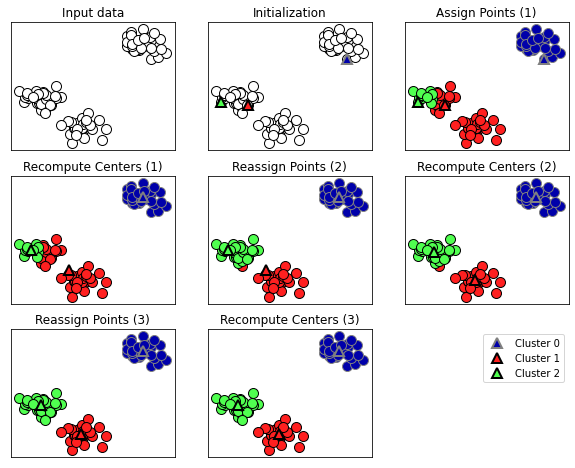

In [2]:
mglearn.plots.plot_kmeans_algorithm()

<br>

이전에 사용한 인위적 데이터셋에 `k-평균 군집` 알고리즘 적용해보자. `KMeans`의 객체를 생성하고 설정하고자하는 cluster의 수를 지정한다(기본값 8). 그런 다음 다른 알고리즘들과 동일하게 `fit`메소드를 호출하여 모델을 훈련시킨다.

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

<br>

훈련 데이터셋으로 훈련시킨 다음, 해당 훈련 데이터셋에 할당된 클러스터 레이블의 결과는 `kmeans.labels_` 속성에서 확인할 수 있다. 클러스터의 갯수를 3개로 지정하였기 때문에 레이블이 0, 1, 2까지의 번호로 지정되었다. (더불어 해당 숫자들에는 어떤 특정한 의미가 있는 것은 아니다.)

In [4]:
print(kmeans.labels_)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


<br>

또한 `predict` 메소드를 사용해서 새로운 데이터(ex.테스트 데이터셋)의 클러스터 레이블을 예측할 수 있다. <u>예측은 각 포인트에 가장 가까운 클러스터 중심을 할당하는 것</u>이며 기존 모델을 변경시키지 않는다. 아래의 코드에서는 `predict`메소드에 훈련할 때 쓰인 데이터셋에 적용시켰기 때문에 위의 `kmeans.labels_`와 결과가 동일한 것이다. 새로운 데이터 셋에 적용했을 경우 다른 배열의 레이블들을 확인할 수 있을 것이다.

In [5]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


<br>

하지만 이러한 k평균 군집도 주의해야할 점이 있다. 해당 알고리즘은 <u>초기화를 무작위로 하기 때문에 알고리즘을 다시 실행하면 클러스터의 번호가 다르게 부여될 수 있다.</u> 이를 확인하기 위해 위의 훈련 결과를 재반복하면 레이블 배열이 다르게 출력되는 것을 확인할 수 있다.

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


<br>

---

#### <u>k-평균 알고리즘이 실패하는 경우</u>

반복할 때마다 초기화가 무작위로 된다는 단점만 존재할 것 같은 `k-평균 군집`알고리즘이라도 항상 이를 완벽하게 해내는 것은 아니다...ㅠㅠ. 해당 알고리즘에서 가장 중요한 것은 `클러스터 중심과 클러스터 중심으로 부터의 유클리디안 거리` 뿐이다. 따라서, 이 알고리즘이 만드는 대부분의 클러스터 결과는 <b>둥근 형태</b>로 나타나게 된다.

<br>

그렇기 때문에, `데이터들의 밀집이 다를 경우` 아래와 같이 예상치 못한 결과를 만들기도 한다. (아래 예제의 경우 클러스터 2에 속해야할 거같은 클러스터 0와 1 데이터가 확인되어진다.)

Text(0, 0.5, '특성 1')

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


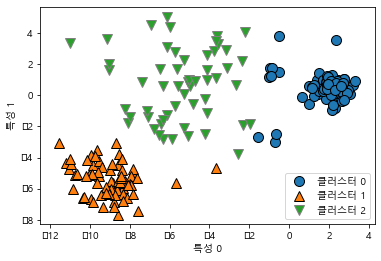

In [11]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

만약 데이터들이 `대각선`으로 길게 늘어져 있으면 어떨까? 이 경우에도 `k-평균 군집`의 약점이 들어난다. 아래의 예제가 그 예시에 해당한다. 문제점이 어떤 것이냐면, 아래의 데이터셋의 배열의 색을 무시하고 고려하였을 때, 군집으로 묶는다면 길게 늘어진 그룹 3개로 묶여지게 생겼지만, 알고리즘 특성상 둥글게 군집이 형성된 것을 확인할 수 있다.

Text(0, 0.5, '특성 1')

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


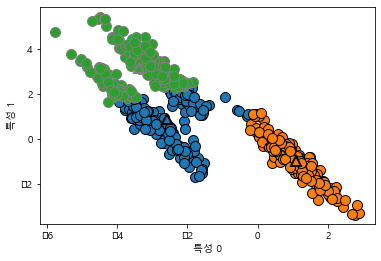

In [15]:
# 무작위로 클러스터 데이터 생성합니다
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

<br>

`대각선 데이터 형태`에서도 말썽이고 `밀집도가 적은 데이터 형태`에서도 말썽인데, two_moons 데이터처럼 `복잡한 데이터 형태`라면 어떨까? 당연히 성능은 좋지 않을 것이다. 이는 다음의 예제에서 확인할 수 있다.  

Text(0, 0.5, '특성 1')

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


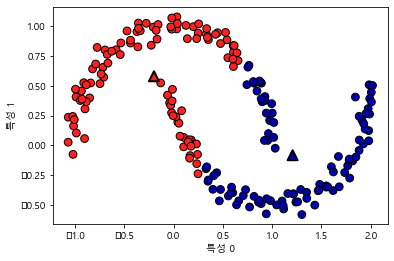

In [16]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

<br>

`k-평균 군집`은 이러한 세 가지 데이터를 구별하는 데 있어서 성능이 매우 떨어진다는 것을 알 수 있었다. 그렇다면 이를 보완하기 위한 방법은 없을까? 당연히 존재하며, 이 방법들 중 하나를 `벡터 양자화`라고 부른다.

<br>

---

#### <u>벡터 양자화 또는 메서드로서의 k-평균</u>

`k-평균 군집`은 클러스터 중심으로 각 데이터 포인트를 표현했습니다. 그런데 이러한 각 데이터 포인트는 `클러스터 중심`, 즉 하나의 `성분`으로 표현된다고도 할 수 있다. 

<br>

`성분`하면 이전의 `PCA`와 `NMF`에서 데이터 포인트를 성분의 합으로 표현했던 것을 떠올릴 것이다. 이는 `k-평균`에서도 `클러스터 중심`이라는 `성분`으로도 비슷하게 가능하다. 

<br>

이렇게 하나의 `클러스터 중심`을 하나의 `성분`으로 분해되는 관점으로 보는 것을 `백터 양자화(vector quantization)` 이라고 한다.

<br>

`k-평균`에서 `백터 양자화`를 이용하면 입력 데이터의 차원보다 더 많은 클러스터(ex. 2차원에서 10개의 클러스터)들을 사용해 데이터를 인코딩 할 수 있게 된다. 2차원에서 `PCA`, `NMF`를 사용하게 될 경우 1차원으로 축소되어 데이터 구조가 완전히 파괴되지만, `클러스터 중심을 사용한 k-평균`<u>을 사용할 경우 파괴되기보다는 오히려 데이터를 더 잘 표현할 수 있게 되는 것이다</u>.

<br>

이전에 표현하지 못했던 복잡한 형태의 데이터도 `백터 양자화`를 응용하게 될 경우 완벽한  두 개의 반달 형태로 데이터를 구분하는 것이 가능하게된다. 이유는 다음과 같다. 아래의 그림에서는 0에서 9까지의 레이블이 형성된 것을 볼 수 잇는데, 레이블들을 묶어 하나의 반달 형태의 클러스터로 재결합해서 생각해 볼 수 있다.

클러스터 레이블:
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


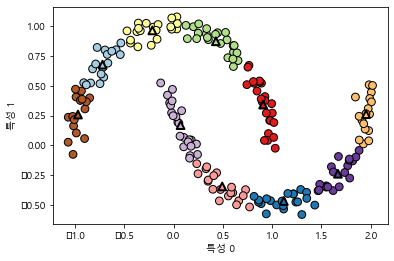

In [36]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

---

#### <u>k-평균 알고리즘의 장단점</u>

- <b>장점</b>
    - 대용량 데이터셋에도 잘 작동
    - 큰 대규모 데이터셋을 처리할 수 있는 MiniBatchKMeans

- <b>단점</b>
    - 클러스터의 모양이 둥근 원 형태로 가정되어 있다.
    - 클러스터의 개수를 수동으로 지정해줘야 한다.

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)